# TUTORIAL OF TENSORFLOW API 02 ==> SEQUENTIAL MODEL TENSORFLOW

In [81]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers.experimental import preprocessing
np.set_printoptions(precision=3, suppress=True)

In [82]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [83]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


## Clean the data

In [85]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [86]:
dataset = dataset.dropna()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


## Convert categorical 'Origin' into one-hot data

In [87]:
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1
dataset['Europe'] = (origin == 2)*1
dataset['Japan'] = (origin == 3)*1
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


## Slip data into train and test set

In [88]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
print("All dataset shape: ",dataset.shape)
print("Train dataset shape: ",train_dataset.shape)
print("Test dataset shape: ", test_dataset.shape)
train_dataset.describe().transpose()

All dataset shape:  (392, 10)
Train dataset shape:  (314, 10)
Test dataset shape:  (78, 10)


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


## Split features from dataset of train and test set

In [89]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

## Plot to visualize some examples based on features and labels

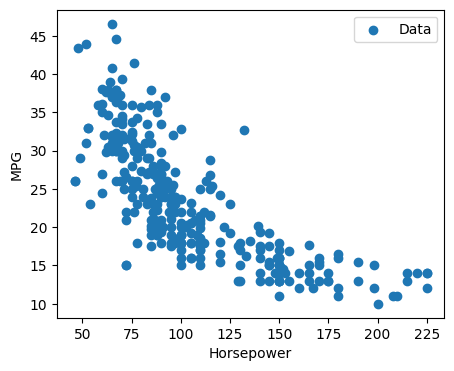

In [90]:
def plot(feature, x=None, y=None):
  plt.figure(figsize=(5, 4))

  plt.scatter(train_features[feature], train_labels, label='Data')
  if x is not None and y is not None:
    plt.plot(x, y, color='k', label='Predictions')

  plt.xlabel(feature)
  plt.ylabel('MPG')
  plt.legend()

plot('Horsepower')

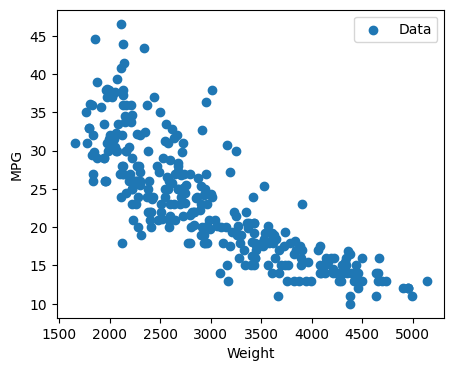

In [91]:
plot('Weight')

## Normalize for faster training

In [92]:
print(train_features.describe().transpose()[['mean', 'std']])

                     mean         std
Cylinders        5.477707    1.699788
Displacement   195.318471  104.331589
Horsepower     104.869427   38.096214
Weight        2990.251592  843.898596
Acceleration    15.559236    2.789230
Model Year      75.898089    3.675642
USA              0.624204    0.485101
Europe           0.178344    0.383413
Japan            0.197452    0.398712


In [111]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.624    0.178
     0.197]]


In [112]:
# apply formula (input - mean)/std
first = np.array(train_features[:1])
print("Original first example: ", first)
print("Normalized first example: ", normalizer(first).numpy())

Original first example:  [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalized first example:  [[-0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


# Regression single feature
## 1. Normolize single input feature as Horsepower
## 2. Apply Linear Regression y = w*x + b to produce output Dense

In [113]:
feature = 'Horsepower'
single_feature = np.array(train_features[feature])
print(single_feature.shape, train_features.shape)


(314,) (314, 9)


In [117]:
single_feature_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
single_feature_normalizer.adapt(single_feature)

## *** Simple Neural Network

In [118]:
single_feature_model = keras.models.Sequential([
    single_feature_normalizer,
    keras.layers.Dense(units=1) # Linear Regression
])

In [119]:
single_feature_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_26 (Normaliz  (None, 1)                 3         
 ation)                                                          
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


## Loss and Optimizer

In [120]:
loss = keras.losses.MeanAbsoluteError() # can use Mean Square Error
optimizer = keras.optimizers.Adam(learning_rate=0.1)

single_feature_model.compile(loss=loss, optimizer=optimizer)

## History to store progress training

In [121]:
history = single_feature_model.fit(
    train_features['Horsepower'],
    train_labels,
    verbose = 1,
    validation_split = 0.2,
    epochs=100)

Epoch 1/100
8/8 [==============================] - 2s 92ms/step - loss: 22.8658 - val_loss: 22.9368
Epoch 2/100
8/8 [==============================] - 0s 27ms/step - loss: 22.0632 - val_loss: 22.1366
Epoch 3/100
8/8 [==============================] - 0s 17ms/step - loss: 21.2641 - val_loss: 21.3368
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 20.4614 - val_loss: 20.5368
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 19.6627 - val_loss: 19.7369
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 18.8606 - val_loss: 18.9368
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 18.0658 - val_loss: 18.1365
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 17.2612 - val_loss: 17.3365
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 16.4691 - val_loss: 16.5363
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 15.6613 - val_loss: 15.7364
Epo

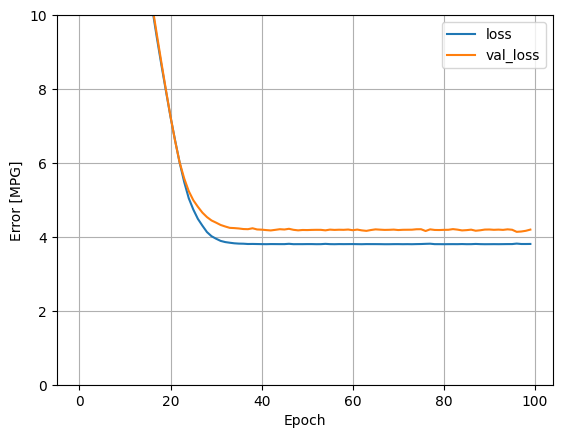

In [122]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

## Evaluation Simple NN

In [123]:
single_feature_model.evaluate(test_features['Horsepower'], test_labels, verbose=1)

3/3 [==============================] - 0s 5ms/step - loss: 3.6569


3.656933069229126

7/7 [==============================] - 0s 5ms/step


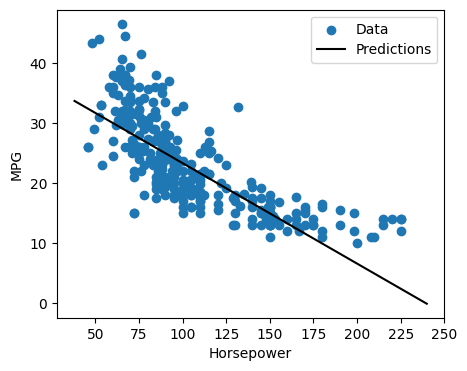

In [126]:
range_min = np.min(test_features['Horsepower']) - 10
range_max = np.max(test_features['Horsepower']) + 10
x = np.linspace(range_min, range_max, 200)
y = single_feature_model.predict(x)
plot(feature,x, y)


## *** Deep Neural Network

In [127]:
deepNN_feature_model = keras.models.Sequential([
    single_feature_normalizer,
    keras.layers.Dense(units=64, activation='relu', name='dense1'),
    keras.layers.Dense(units=64, activation='relu', name='dense2'),

    keras.layers.Dense(units=1) # Linear Regression
])
deepNN_feature_model.compile(loss=loss, optimizer=keras.optimizers.Adam(learning_rate=0.001))
deepNN_feature_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_26 (Normaliz  (None, 1)                 3         
 ation)                                                          
                                                                 
 dense1 (Dense)              (None, 64)                128       
                                                                 
 dense2 (Dense)              (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4356 (17.02 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [128]:
history = deepNN_feature_model.fit(
    train_features['Horsepower'],
    train_labels,
    verbose = 1,
    validation_split = 0.2,
    epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 58ms/step - loss: 23.1775 - val_loss: 23.5889
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 22.9905 - val_loss: 23.4041
Epoch 3/100
8/8 [==============================] - 0s 16ms/step - loss: 22.8130 - val_loss: 23.1840
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 22.5851 - val_loss: 22.9189
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 22.3106 - val_loss: 22.5890
Epoch 6/100
8/8 [==============================] - 0s 14ms/step - loss: 21.9531 - val_loss: 22.1493
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 21.4769 - val_loss: 21.5645
Epoch 8/100
8/8 [==============================] - 0s 14ms/step - loss: 20.8485 - val_loss: 20.8176
Epoch 9/100
8/8 [==============================] - 0s 15ms/step - loss: 20.0509 - val_loss: 19.8828
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 19.0798 - val_loss: 18.8258

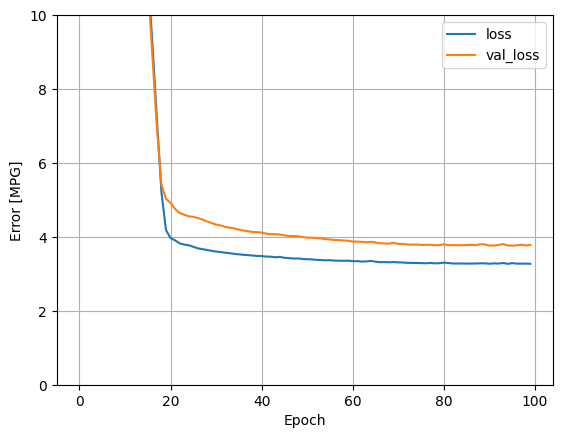

In [129]:
plot_loss(history)

## Evaluation Deep NN

In [130]:
deepNN_feature_model.evaluate(test_features['Horsepower'], test_labels, verbose=1)

3/3 [==============================] - 0s 6ms/step - loss: 2.9493


2.9493119716644287

7/7 [==============================] - 0s 14ms/step


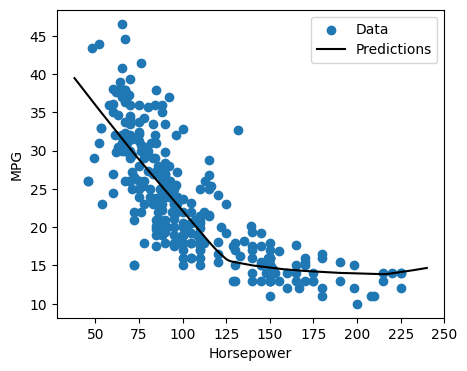

In [132]:
x = np.linspace(range_min, range_max, 200)
y = deepNN_feature_model.predict(x)
plot(feature,x, y)

# Regression multiple features


In [133]:
linear_all_feature_model = keras.models.Sequential([
    normalizer,
    keras.layers.Dense(units=64, activation='relu', name='dense1'),
    keras.layers.Dense(units=64, activation='relu', name='dense2'),

    keras.layers.Dense(units=1) # Linear Regression
])
linear_all_feature_model.compile(loss=loss, optimizer=keras.optimizers.Adam(learning_rate=0.001))
linear_all_feature_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_23 (Normaliz  (None, 9)                 19        
 ation)                                                          
                                                                 
 dense1 (Dense)              (None, 64)                640       
                                                                 
 dense2 (Dense)              (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4884 (19.08 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [134]:
history = linear_all_feature_model.fit(
    train_features,
    train_labels,
    verbose = 1,
    validation_split = 0.2,
    epochs=100)

Epoch 1/100
8/8 [==============================] - 3s 151ms/step - loss: 22.9682 - val_loss: 23.0560
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 22.2743 - val_loss: 22.2832
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 21.5110 - val_loss: 21.3918
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 20.5876 - val_loss: 20.2838
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 19.4369 - val_loss: 18.8687
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 17.9566 - val_loss: 17.0267
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 16.0329 - val_loss: 14.8224
Epoch 8/100
8/8 [==============================] - 0s 12ms/step - loss: 13.8028 - val_loss: 12.7407
Epoch 9/100
8/8 [==============================] - 0s 12ms/step - loss: 11.5828 - val_loss: 10.4642
Epoch 10/100
8/8 [==============================] - 0s 13ms/step - loss: 9.0649 - val_loss: 7.6374
Ep

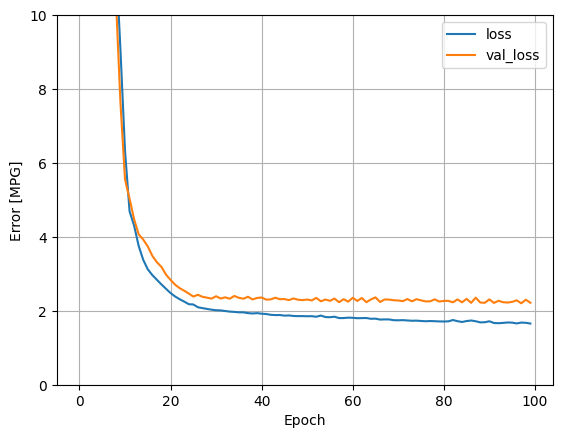

In [135]:
plot_loss(history)

## Evaluation Deep NN with all features

In [136]:
linear_all_feature_model.evaluate(test_features, test_labels, verbose=1)

3/3 [==============================] - 0s 6ms/step - loss: 1.7591


1.7591217756271362